<img src="https://nserc-hi-am.ca/2020/wp-content/uploads/sites/18/2019/12/McGill.png" width="500" height="400" align="left">

# Group Project - Team 8

## Students
#### Ram Babu
#### Foteh Gafarov
#### Arnaud Guzman-Annès
#### Mehdi Karoui
#### Jules Zielinski

<hr style="border:2px solid black"> </hr>

#### Date: February 22nd, 2021

**Objective:**

XXX

# I - Data preprocessing

## Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed as well as Scikit-Learn (V ≥0.20).

In [236]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# For text procesing
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

analyser = SentimentIntensityAnalyzer()

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
pd.options.mode.chained_assignment = None  # default='warn'

#display all columns
pd.set_option('display.max_columns', None)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Get the data

## From GitHub repository

In [237]:
import pandas as pd
import requests
import io
    
# Downloading the csv file from GitHub account
url1 = "https://raw.githubusercontent.com/arguz95/Crypto/main/Data/Cardano%20Tweets(no%20retweets%20English%20and%20US%20region)%202017.csv"
url2 = "https://raw.githubusercontent.com/arguz95/Crypto/main/Data/Cardano%20Tweets(no%20retweets%20English%20and%20US%20region)%202018.csv"
url3 = "https://raw.githubusercontent.com/arguz95/Crypto/main/Data/Cardano%20Tweets(no%20retweets%20English%20and%20US%20region)%202020.csv"

download1 = requests.get(url1).content
download2 = requests.get(url2).content
download3 = requests.get(url3).content

# Reading the downloaded content and turning it into a pandas dataframe
df_2017 = pd.read_csv(io.StringIO(download1.decode('utf-8')))
df_2018 = pd.read_csv(io.StringIO(download2.decode('utf-8')))
df_2020 = pd.read_csv(io.StringIO(download3.decode('utf-8')))

# Printing out the first 5 rows of the dataframe
df_2020.head()

text lang     user-location  \
0  Happy new year everyone!  Thanks for being a p...   en  Jackson, Wyoming   
1  Former US Congressional Candidate States Why C...   en      New York, NY   
2  I wish I could understand this whale. \n\nI wa...   en          New York   
3  Cardano Price Analysis: 31 December https://t....   en      New York, NY   
4  Our featured article for today! Please don't f...   en     United States   

  place-country place-country_code location-coordinates user-screen_name  \
0           NaN                NaN                  NaN      TetonBlocks   
1           NaN                NaN                  NaN  davidgokhshtein   
2           NaN                NaN                  NaN       RealSaidov   
3           NaN                NaN                  NaN     BTCstJournal   
4           NaN                NaN                  NaN   fintechnewshub   

                       created_at  quote_count  reply_count  retweet_count  \
0  Thu Dec 31 23:58:47 +0000 2020            0            0              0   
1  Thu Dec 31 23:49:21 +0000 2020            6           15             47   
2  Thu Dec 31 23:43:21 +0000 2020            0            1              0   
3  Thu Dec 31 23:35:17 +0000 2020            0            0              1   
4  Thu Dec 31 23:33:55 +0000 2020            0            0              1   

   retweeted  is_retweet  is_quote_status  Unnamed: 14  
0      False           0            False          NaN  
1      False           0            False          NaN  
2      False           0            False          NaN  
3      False           0            False          NaN  
4      False           0            False          NaN

# Data preprocessing

## 1-Tweets

## About the original dataset

XXX

In [3]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  2056 non-null   object 
 1   lang                  2056 non-null   object 
 2   user-location         1951 non-null   object 
 3   place-country         78 non-null     object 
 4   place-country_code    78 non-null     object 
 5   location-coordinates  78 non-null     object 
 6   user-screen_name      2056 non-null   object 
 7   created_at            2056 non-null   object 
 8   quote_count           2056 non-null   int64  
 9   reply_count           2056 non-null   int64  
 10  retweet_count         2056 non-null   int64  
 11  retweeted             2056 non-null   bool   
 12  is_retweet            2056 non-null   int64  
 13  is_quote_status       2056 non-null   bool   
 14  Unnamed: 14           0 non-null      float64
dtypes: bool(2), float64(1

In [4]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  5578 non-null   object 
 1   lang                  5578 non-null   object 
 2   user-location         5481 non-null   object 
 3   place-country         38 non-null     object 
 4   place-country_code    38 non-null     object 
 5   location-coordinates  38 non-null     object 
 6   user-screen_name      5578 non-null   object 
 7   created_at            5578 non-null   object 
 8   quote_count           5578 non-null   int64  
 9   reply_count           5578 non-null   int64  
 10  retweet_count         5578 non-null   int64  
 11  retweeted             5578 non-null   bool   
 12  is_retweet            5578 non-null   int64  
 13  is_quote_status       5578 non-null   bool   
 14  Unnamed: 14           0 non-null      float64
dtypes: bool(2), float64(1

In [5]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7885 entries, 0 to 7884
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  7885 non-null   object 
 1   lang                  7885 non-null   object 
 2   user-location         7607 non-null   object 
 3   place-country         65 non-null     object 
 4   place-country_code    65 non-null     object 
 5   location-coordinates  65 non-null     object 
 6   user-screen_name      7885 non-null   object 
 7   created_at            7885 non-null   object 
 8   quote_count           7885 non-null   int64  
 9   reply_count           7885 non-null   int64  
 10  retweet_count         7885 non-null   int64  
 11  retweeted             7885 non-null   bool   
 12  is_retweet            7885 non-null   int64  
 13  is_quote_status       7885 non-null   bool   
 14  Unnamed: 14           0 non-null      float64
dtypes: bool(2), float64(1

In [6]:
# Some more information about the dataset

display(df_2017.shape)
display(df_2017.isnull().sum())
display(df_2017.describe())

(2056, 15)

text                       0
lang                       0
user-location            105
place-country           1978
place-country_code      1978
location-coordinates    1978
user-screen_name           0
created_at                 0
quote_count                0
reply_count                0
retweet_count              0
retweeted                  0
is_retweet                 0
is_quote_status            0
Unnamed: 14             2056
dtype: int64

quote_count  reply_count  retweet_count  is_retweet  Unnamed: 14
count  2056.000000  2056.000000    2056.000000      2056.0          0.0
mean      0.227140     0.785992       1.941634         0.0          NaN
std       1.318579     4.476912      12.964691         0.0          NaN
min       0.000000     0.000000       0.000000         0.0          NaN
25%       0.000000     0.000000       0.000000         0.0          NaN
50%       0.000000     0.000000       0.000000         0.0          NaN
75%       0.000000     0.000000       0.000000         0.0          NaN
max      39.000000    90.000000     328.000000         0.0          NaN

## Initial Observations - 2017

- There are 2056 rows and 15 columns.
- `user-location` column have 105 missing values.
- `place-country ` column have 1978 missing values.
- `place-country_code` column have 1978 missing values.
- `location-coordinates` column have 1978 missing values.
- `Unnamed: 14 ` column have 2056 missing values.

In [7]:
# Some more information about the dataset

display(df_2018.shape)
display(df_2018.isnull().sum())
display(df_2018.describe())

(5578, 15)

text                       0
lang                       0
user-location             97
place-country           5540
place-country_code      5540
location-coordinates    5540
user-screen_name           0
created_at                 0
quote_count                0
reply_count                0
retweet_count              0
retweeted                  0
is_retweet                 0
is_quote_status            0
Unnamed: 14             5578
dtype: int64

quote_count  reply_count  retweet_count  is_retweet  Unnamed: 14
count  5578.000000  5578.000000    5578.000000      5578.0          0.0
mean      0.242919     0.552886       1.707781         0.0          NaN
std       7.050928     7.995055      33.291971         0.0          NaN
min       0.000000     0.000000       0.000000         0.0          NaN
25%       0.000000     0.000000       0.000000         0.0          NaN
50%       0.000000     0.000000       0.000000         0.0          NaN
75%       0.000000     0.000000       0.000000         0.0          NaN
max     388.000000   332.000000    1747.000000         0.0          NaN

## Initial Observations - 2018

- There are 5578 rows and 15 columns.
- `user-location` column have 97 missing values.
- `place-country ` column have 5540 missing values.
- `place-country_code` column have 5540 missing values.
- `location-coordinates` column have 5540 missing values.
- `Unnamed: 14 ` column have 5578 missing values.

In [8]:
# Some more information about the dataset

display(df_2020.shape)
display(df_2020.isnull().sum())
display(df_2020.describe())

(7885, 15)

text                       0
lang                       0
user-location            278
place-country           7820
place-country_code      7820
location-coordinates    7820
user-screen_name           0
created_at                 0
quote_count                0
reply_count                0
retweet_count              0
retweeted                  0
is_retweet                 0
is_quote_status            0
Unnamed: 14             7885
dtype: int64

quote_count  reply_count  retweet_count  is_retweet  Unnamed: 14
count  7885.000000  7885.000000    7885.000000      7885.0          0.0
mean      0.565631     1.162207       2.624350         0.0          NaN
std       3.574270     6.296048      12.065562         0.0          NaN
min       0.000000     0.000000       0.000000         0.0          NaN
25%       0.000000     0.000000       0.000000         0.0          NaN
50%       0.000000     0.000000       0.000000         0.0          NaN
75%       0.000000     0.000000       1.000000         0.0          NaN
max     106.000000   262.000000     305.000000         0.0          NaN

## Initial Observations - 2020

- There are 7885 rows and 15 columns.
- `user-location` column have 278 missing values.
- `place-country ` column have 7820 missing values.
- `place-country_code` column have 7820 missing values.
- `location-coordinates` column have 7820 missing values.
- `Unnamed: 14 ` column have 7885 missing values.

In [9]:
# Droping non useful columns

df_2017.drop(columns=['place-country', 'place-country_code', 'location-coordinates', 'Unnamed: 14'])
df_2018.drop(columns=['place-country', 'place-country_code', 'location-coordinates', 'Unnamed: 14'])
df_2020.drop(columns=['place-country', 'place-country_code', 'location-coordinates', 'Unnamed: 14'])

text lang  \
0     Happy new year everyone!  Thanks for being a p...   en   
1     Former US Congressional Candidate States Why C...   en   
2     I wish I could understand this whale. \n\nI wa...   en   
3     Cardano Price Analysis: 31 December https://t....   en   
4     Our featured article for today! Please don't f...   en   
...                                                 ...  ...   
7880  #BTC #XTZ #ATOM #ETH #TOP #ADA #LTC #XLM #XRP ...   en   
7881  E220 Update: \n\nIt is a close race this epoch...   en   
7882  #LTC #XVG #TPAY #ADA #ETH #BTC #BCH Cardano co...   en   
7883  Well....no dates in September for #goguen. 😕😕\...   en   
7884  UToday:\n\n#AI Firm Behind Robot #Sophia Partn...   en   

         user-location user-screen_name                      created_at  \
0     Jackson, Wyoming      TetonBlocks  Thu Dec 31 23:58:47 +0000 2020   
1         New York, NY  davidgokhshtein  Thu Dec 31 23:49:21 +0000 2020   
2             New York       RealSaidov  Thu Dec 31 23:43:21 +0000 2020   
3         New York, NY     BTCstJournal  Thu Dec 31 23:35:17 +0000 2020   
4        United States   fintechnewshub  Thu Dec 31 23:33:55 +0000 2020   
...                ...              ...                             ...   
7880               USA    webnowcompany  Thu Oct 01 02:26:36 +0000 2020   
7881          New York       RealSaidov  Thu Oct 01 01:54:35 +0000 2020   
7882               USA    webnowcompany  Thu Oct 01 01:44:41 +0000 2020   
7883             Earth   TheCryptoviser  Thu Oct 01 01:01:24 +0000 2020   
7884     United States        JollyCoin  Thu Oct 01 00:38:12 +0000 2020   

      quote_count  reply_count  retweet_count  retweeted  is_retweet  \
0               0            0              0      False           0   
1               6           15             47      False           0   
2               0            1              0      False           0   
3               0            0              1      False           0   
4               0            0              1      False           0   
...           ...          ...            ...        ...         ...   
7880            0            0              0      False           0   
7881            0            0              1      False           0   
7882            0            0              0      False           0   
7883            0            3              0      False           0   
7884            0            0              1      False           0   

      is_quote_status  
0               False  
1               False  
2               False  
3               False  
4               False  
...               ...  
7880            False  
7881            False  
7882            False  
7883             True  
7884            False  

[7885 rows x 11 columns]

In [10]:
# Text preprocesing

xl_2017 = df_2017['text'].str.lower()
xl_2018 = df_2018['text'].str.lower()
xl_2020 = df_2020['text'].str.lower()

df_2017['text'] = xl_2017
df_2018['text'] = xl_2018
df_2020['text'] = xl_2020

In [31]:
# This steps takes time

nltk.download('stopwords')
from nltk.tokenize import word_tokenize

#2017
xl_2017 = xl_2017.tolist()
for i in range(len(xl_2017)): 
    text_tk = word_tokenize(xl_2017[i])
    s = [word for word in text_tk if not word in stopwords.words()]
    xl_2017[i] = ' '.join([str(elem) for elem in s])

#2018
xl_2018 = xl_2018.tolist()
for i in range(len(xl_2018)): 
    text_tk = word_tokenize(xl_2018[i])
    s = [word for word in text_tk if not word in stopwords.words()]
    xl_2018[i] = ' '.join([str(elem) for elem in s])

#2020
xl_2020 = xl_2020.tolist()
for i in range(len(xl_2020)): 
    text_tk = word_tokenize(xl_2020[i])
    s = [word for word in text_tk if not word in stopwords.words()]
    xl_2020[i] = ' '.join([str(elem) for elem in s])

[nltk_data] Downloading package stopwords to /Users/arnaudguzman-
[nltk_data]     annes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
df_2017 = df_2017.drop(['text'], axis=1)
df_2018 = df_2018.drop(['text'], axis=1)
df_2020 = df_2020.drop(['text'], axis=1)

df_2017['text'] = xl_2017
df_2018['text'] = xl_2018
df_2020['text'] = xl_2020

df_2017.to_csv('tweet_2017.csv')
df_2018.to_csv('tweet_2018.csv')
df_2020.to_csv('tweet_2020.csv')

## 2-Headlines - News

In [12]:
# Downloading the csv file from GitHub account
url4 = "https://raw.githubusercontent.com/arguz95/Crypto/main/Data/google_news.csv"

download4 = requests.get(url4).content

# Reading the downloaded content and turning it into a pandas dataframe
df_news = pd.read_csv(io.StringIO(download4.decode('utf-8')))

# Printing out the first 5 rows of the dataframe
df_news.head()

source                                           headline  \
0       TechBullion     Everything You Need to Know About Server Space   
1     Investing.com  Jabil (JBL) Q1 Earnings Beat Estimates, Revenu...   
2  Investing.com UK  US Congress reaches deal on COVID-19 aid packa...   
3          FXStreet  Cardano Price Prediction: ADA bulls set to rec...   
4           U.Today   Cardano Reaches Major Decentralization Milestone   

                                             content          date  
0  ... for cryptocurrencies and for the whole wor...   Dec 8, 2020  
1  Andy Hecht · Cryptocurrency Leaders: Cardano A...  Dec 17, 2020  
2  Cardano Jumps 20.45% In Bullish Trade By Inves...  Dec 21, 2020  
3  Cardano (ADA/USD) is looking to extend the ear...  Dec 12, 2020  
4  This marks a major decentralization milestone ...   Nov 2, 2020

In [13]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   source    229 non-null    object
 1   headline  229 non-null    object
 2   content   229 non-null    object
 3   date      229 non-null    object
dtypes: object(4)
memory usage: 7.3+ KB


In [14]:
# Some more information about the dataset

display(df_news.shape)
display(df_news.isnull().sum())
display(df_news.describe())

(230, 4)

source      1
headline    1
content     1
date        1
dtype: int64

source                                           headline  \
count        229                                                229   
unique        55                                                229   
top     FXStreet  Company Behind AI Robot Sophia May Shift ‘Sign...   
freq          27                                                  1   

                                                  content         date  
count                                                 229          229  
unique                                                213           77  
top     ... Dogecoin Army Recruit Gene Simmons Turns C...  1 month ago  
freq                                                    9           14

## Initial Observations - News

- There are 230 rows and 4 columns.
- `source` column have 1 missing values.
- `headline` column have 1 missing values.
- `content` column have 1 missing values.
- `date` column have 1 missing values.

In [15]:
# Drop empty observation

df_news = df_news.dropna()
#df_news.fillna('Unknown', inplace = True)

In [16]:
# Text preprocesing

xl_news_head = df_news['headline'].str.lower()
xl_news_content = df_news['content'].str.lower()

df_news['headline'] = xl_news_head
df_news['content'] = xl_news_content

In [69]:
# This steps takes time

#Headline
xl_news_head = xl_news_head.tolist()
for i in range(len(xl_news_head)): 
    text_tk = word_tokenize(xl_news_head[i])
    s = [word for word in text_tk if not word in stopwords.words()]
    xl_news_head[i] = ' '.join([str(elem) for elem in s])

#Content
xl_news_content = xl_news_content.tolist()
for i in range(len(xl_news_content)): 
    text_tk = word_tokenize(xl_news_content[i])
    s = [word for word in text_tk if not word in stopwords.words()]
    xl_news_content[i] = ' '.join([str(elem) for elem in s])

In [17]:
df_news = df_news.drop(['headline'], axis=1)
df_news = df_news.drop(['content'], axis=1)

df_news['headline'] = xl_news_head
df_news['content'] = xl_news_content

df_news.to_csv('news_2020.csv')

## 3-Cardano

In [18]:
# Downloading the csv file from GitHub account
url5 = "https://raw.githubusercontent.com/arguz95/Crypto/main/Data/ADA-USD.csv"

download5 = requests.get(url5).content

# Reading the downloaded content and turning it into a pandas dataframe
df_cardano = pd.read_csv(io.StringIO(download5.decode('utf-8')))

# Printing out the first 5 rows of the dataframe
df_cardano.head()

Date      Open      High       Low     Close  Adj Close       Volume
0  2020-10-01  0.101202  0.104311  0.096007  0.097878   0.097878  499813017.0
1  2020-10-02  0.097894  0.099826  0.090471  0.092913   0.092913  602540074.0
2  2020-10-03  0.092913  0.095158  0.092635  0.093684   0.093684  334059453.0
3  2020-10-04  0.093684  0.096791  0.092884  0.096301   0.096301  482409858.0
4  2020-10-05  0.096301  0.098844  0.096255  0.097687   0.097687  432817916.0

In [19]:
df_cardano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       92 non-null     object 
 1   Open       89 non-null     float64
 2   High       89 non-null     float64
 3   Low        89 non-null     float64
 4   Close      89 non-null     float64
 5   Adj Close  89 non-null     float64
 6   Volume     89 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.2+ KB


In [20]:
# Some more information about the dataset

display(df_cardano.shape)
display(df_cardano.isnull().sum())
display(df_cardano.describe())

(92, 7)

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

Open       High        Low      Close  Adj Close        Volume
count  89.000000  89.000000  89.000000  89.000000  89.000000  8.900000e+01
mean    0.126764   0.132220   0.121652   0.127556   0.127556  9.946031e+08
std     0.028607   0.031025   0.026320   0.029144   0.029144  5.553639e+08
min     0.092143   0.093834   0.088048   0.092143   0.092143  3.340595e+08
25%     0.103097   0.106979   0.100179   0.104008   0.104008  6.095658e+08
50%     0.109105   0.112231   0.105778   0.109105   0.109105  8.177567e+08
75%     0.154440   0.161383   0.149451   0.155162   0.155162  1.188727e+09
max     0.192022   0.196170   0.176594   0.192164   0.192164  2.967669e+09

## Initial Observations - Cardano

- There are 92 rows and 7 columns.
- `Open` column have 3 missing values.
- `High` column have 3 missing values.
- `Low` column have 3 missing values.
- `Close` column have 3 missing values.
- `Adj Close` column have 3 missing values.
- `Volume` column have 3 missing values.

In [21]:
# Drop empty observation

#df_cardano = df_cardano.dropna()
df_cardano['Open'].fillna((df_cardano['Open'].mean()), inplace=True)
df_cardano['High'].fillna((df_cardano['High'].mean()), inplace=True)
df_cardano['Low'].fillna((df_cardano['Low'].mean()), inplace=True)
df_cardano['Close'].fillna((df_cardano['Close'].mean()), inplace=True)
df_cardano['Adj Close'].fillna((df_cardano['Adj Close'].mean()), inplace=True)
df_cardano['Volume'].fillna((df_cardano['Volume'].mean()), inplace=True)



# WE SHOULD NOW PUT EVERYRHING IN ONE DATASET; MATCHING DATES FROM 2020 FILES (TWEETS, NEWS AND CARDANO STOCKS)

In [238]:
# Downloading the csv file from GitHub account
url7 = "https://raw.githubusercontent.com/arguz95/Crypto/main/preprocessed/tweet_2017.csv"
url8 = "https://raw.githubusercontent.com/arguz95/Crypto/main/preprocessed/tweet_2018.csv"
url9 = "https://raw.githubusercontent.com/arguz95/Crypto/main/preprocessed/tweet_2020.csv"
url10 = "https://raw.githubusercontent.com/arguz95/Crypto/main/preprocessed/news_2020.csv"
url11 = "https://raw.githubusercontent.com/arguz95/Crypto/main/preprocessed/news_2020_2.csv"
url12 = "https://raw.githubusercontent.com/arguz95/Crypto/main/preprocessed/news_2018_2.csv"
url13 = "https://raw.githubusercontent.com/arguz95/Crypto/main/preprocessed/news_2017_2.csv"
url14 = "https://raw.githubusercontent.com/Ram1633/Crypto/main/Data/ADA-USD.csv"
url15 = "https://raw.githubusercontent.com/Ram1633/Crypto/main/Data/ADA-USD (1).csv"
url16 = "https://raw.githubusercontent.com/Ram1633/Crypto/main/Data/ADA-USD (2).csv"

download7 = requests.get(url7).content
download8 = requests.get(url8).content
download9 = requests.get(url9).content
download10 = requests.get(url10).content
download11 = requests.get(url11).content
download12 = requests.get(url12).content
download13 = requests.get(url13).content
download14 = requests.get(url14).content
download15 = requests.get(url15).content
download16 = requests.get(url16).content

# Reading the downloaded content and turning it into a pandas dataframe
tweet2017 = pd.read_csv(io.StringIO(download7.decode('utf-8')))
tweet2018 = pd.read_csv(io.StringIO(download8.decode('utf-8')))
tweet2020 = pd.read_csv(io.StringIO(download9.decode('utf-8')))
news_2020 = pd.read_csv(io.StringIO(download10.decode('utf-8')))
tweet20201 = pd.read_csv(io.StringIO(download11.decode('utf-8')))
tweet20181 = pd.read_csv(io.StringIO(download12.decode('utf-8')))
tweet20171 = pd.read_csv(io.StringIO(download13.decode('utf-8')))
ada1 = pd.read_csv(io.StringIO(download14.decode('utf-8')))
ada2 = pd.read_csv(io.StringIO(download15.decode('utf-8')))
ada3 = pd.read_csv(io.StringIO(download16.decode('utf-8')))


ada1['Open']=ada1['Open'].fillna(ada1['Open'].mean())
ada1['High']=ada1['High'].fillna(ada1['High'].mean())
ada1['Low']=ada1['Low'].fillna(ada1['Low'].mean())
ada1['Close']=ada1['Close'].fillna(ada1['Close'].mean())
ada1['Volume']=ada1['Volume'].fillna(ada1['Volume'].mean())

ada2['Open']=ada2['Open'].fillna(ada2['Open'].mean())
ada2['High']=ada2['High'].fillna(ada2['High'].mean())
ada2['Low']=ada2['Low'].fillna(ada2['Low'].mean())
ada2['Close']=ada2['Close'].fillna(ada2['Close'].mean())
ada2['Volume']=ada2['Volume'].fillna(ada2['Volume'].mean())

ada3['Open']=ada3['Open'].fillna(ada3['Open'].mean())
ada3['High']=ada3['High'].fillna(ada3['High'].mean())
ada3['Low']=ada3['Low'].fillna(ada3['Low'].mean())
ada3['Close']=ada3['Close'].fillna(ada3['Close'].mean())
ada3['Volume']=ada3['Volume'].fillna(ada3['Volume'].mean())

#frames = [tweet2020, tweet2018, tweet2017,tweet20201, tweet20181, tweet20171]
frames = [tweet2020,tweet20201]
tweet2020 = pd.concat(frames)

frames = [ada1,ada2,ada3]
ada = pd.concat(frames)

news_2020.rename(columns={'date': 'Date'}, inplace=True)

news_2020 = news_2020.drop(news_2020[news_2020.Date == "1 month ago"].index)


tweet2020.rename(columns={'created_at': 'Date'}, inplace=True)
tweet2020['Date'] = pd.to_datetime(tweet2020['Date'])
tweet2020['Date'] = tweet2020['Date'].dt.strftime('%Y-%m-%d')
tweet2020['Date'] = pd.to_datetime(tweet2020['Date'])
news_2020['Date'] = pd.to_datetime(news_2020['Date'])
ada['Date'] = pd.to_datetime(ada['Date'])
ada1['Date'] = pd.to_datetime(ada1['Date'])

In [239]:
#ada=ada1.copy()

In [240]:
ada['Open']=ada['Open'].fillna(ada['Open'].mean())
ada['High']=ada['High'].fillna(ada['High'].mean())
ada['Low']=ada['Low'].fillna(ada['Low'].mean())
ada['Close']=ada['Close'].fillna(ada['Close'].mean())
ada['Volume']=ada['Volume'].fillna(ada['Volume'].mean())

ada = ada.reset_index(drop=True)
ada['Price_Change']=0
for i in range(len(ada)-1):
    ada['Price_Change'][i]=((ada['Close'][i+1] - ada['Close'][i])/ada['Close'][i])*100

## Sentiment Analysis

### Tweet

In [241]:
i=0

compval1 = [ ]

while (i<len(tweet2020)):

    k = analyser.polarity_scores(tweet2020.iloc[i]['text'])
    compval1.append(k['compound'])
    
    i = i+1

compval1 = np.array(compval1)

len(compval1)

7885

In [242]:
tweet2020['VADER score'] = compval1

In [243]:
positive_crypto = ['bull', 'bullish', 'ATH', 'all times high', 'innovation', 'technological', 'pump', 'pumping', 
                   'partnership', 'partnered', 'major', 'investment', 'underpriced']
negative_crypto = ['bear', 'dump', 'drops', 'lost', 'overpriced', 'take profits', 'loss', 'dip', 'liquidated']

In [244]:
i = 0

predicted_value = [ ]

while(i<len(tweet2020)):
    for word in positive_crypto:
        if word in tweet2020.iloc[i]['text']:
            tweet2020.iloc[i]['VADER score'] += 0.25
    for word in negative_crypto:
        if word in tweet2020.iloc[i]['text']:
            tweet2020.iloc[i]['VADER score'] -= 0.25

    if ((tweet2020.iloc[i]['VADER score'] >= 0.5)):
        predicted_value.append('positive')
        i = i+1
    elif ((tweet2020.iloc[i]['VADER score'] > -0.5) & (tweet2020.iloc[i]['VADER score'] < 0.5)):
        predicted_value.append('neutral')
        i = i+1
    elif ((tweet2020.iloc[i]['VADER score'] <= -0.5)):
        predicted_value.append('negative')
        i = i+1

In [245]:
tweet2020.head(2)

Unnamed: 0 lang     user-location place-country place-country_code  \
0         0.0   en  Jackson, Wyoming           NaN                NaN   
1         1.0   en      New York, NY           NaN                NaN   

  location-coordinates user-screen_name       Date  quote_count  reply_count  \
0                  NaN      TetonBlocks 2020-12-31          0.0          0.0   
1                  NaN  davidgokhshtein 2020-12-31          6.0         15.0   

   retweet_count retweeted  is_retweet is_quote_status  Unnamed: 14  \
0            0.0     False         0.0           False          NaN   
1           47.0     False         0.0           False          NaN   

                                                text 404: Not Found  \
0  happy new year everyone ! thanks part # cardan...            NaN   
1  former us congressional candidate states carda...            NaN   

   VADER score  
0       0.8908  
1       0.8555

In [246]:
tweet2020_sentiment = tweet2020.groupby('Date')['VADER score'].mean().to_frame()
tweet2020_sentiment.reset_index(inplace=True)

In [247]:
tweet2020_sentiment

Date  VADER score
0  2020-10-01     0.245195
1  2020-10-02     0.221654
2  2020-10-03     0.095984
3  2020-10-04     0.402757
4  2020-10-05     0.280624
..        ...          ...
87 2020-12-27     0.236708
88 2020-12-28     0.293765
89 2020-12-29     0.305050
90 2020-12-30     0.273837
91 2020-12-31     0.269631

[92 rows x 2 columns]

In [248]:
ada_tweets = pd.merge(tweet2020_sentiment,ada,on='Date',how='left')

### News

In [249]:
news_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 0 to 228
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  215 non-null    int64         
 1   source      215 non-null    object        
 2   Date        215 non-null    datetime64[ns]
 3   headline    215 non-null    object        
 4   content     215 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 10.1+ KB


In [250]:
i=0

compval2 = [ ]

while (i<len(news_2020)):

    k = analyser.polarity_scores(news_2020.iloc[i]['headline'])
    compval2.append(k['compound'])
    
    i = i+1

compval2 = np.array(compval2)

len(compval2)

215

In [251]:
i=0

compval3 = [ ]

while (i<len(news_2020)):

    k = analyser.polarity_scores(news_2020.iloc[i]['content'])
    compval3.append(k['compound'])
    
    i = i+1

compval3 = np.array(compval3)

len(compval3)

215

In [252]:
news_2020['VADER score_headline'] = compval2

In [253]:
news_2020['VADER score_content'] = compval3

In [254]:
news_2020_sentiment = news_2020.groupby('Date')['VADER score_headline','VADER score_content'].mean()
news_2020_sentiment.reset_index(inplace=True)

<ipython-input-254-dd0ee8893222>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [255]:
news_2020_sentiment

Date  VADER score_headline  VADER score_content
0  2020-10-01              0.097000             0.401129
1  2020-10-02              0.158900             0.401133
2  2020-10-03             -0.051350             0.340400
3  2020-10-04              0.000000             0.107050
4  2020-10-05              0.340400             0.359200
..        ...                   ...                  ...
71 2020-12-22              0.000000             0.148767
72 2020-12-23              0.083333            -0.190633
73 2020-12-24              0.000000             0.000000
74 2020-12-25             -0.058700             0.041650
75 2020-12-26              0.159100             0.376500

[76 rows x 3 columns]

In [256]:
ada_news = pd.merge(ada,news_2020_sentiment,on='Date',how='left')

In [257]:
ada_news['Day_1_Positive'] = 0

for i in range(len(ada_news)-1):
    if ada_news['Close'][i+1] > ada_news['Close'][i]:
        ada_news['Day_1_Positive'][i] += 1
        
ada_tweets['Day_1_Positive'] = 0

for i in range(len(ada_tweets)-1):
    if ada_tweets['Close'][i+1] > ada_tweets['Close'][i]:
        ada_tweets['Day_1_Positive'][i] += 1

In [258]:
ada_tweets

Date  VADER score      Open      High       Low     Close  Adj Close  \
0  2020-10-01     0.245195  0.101202  0.104311  0.096007  0.097878   0.097878   
1  2020-10-02     0.221654  0.097894  0.099826  0.090471  0.092913   0.092913   
2  2020-10-03     0.095984  0.092913  0.095158  0.092635  0.093684   0.093684   
3  2020-10-04     0.402757  0.093684  0.096791  0.092884  0.096301   0.096301   
4  2020-10-05     0.280624  0.096301  0.098844  0.096255  0.097687   0.097687   
..        ...          ...       ...       ...       ...       ...        ...   
87 2020-12-27     0.236708  0.157835  0.165190  0.150378  0.154422   0.154422   
88 2020-12-28     0.293765  0.154440  0.178583  0.153445  0.176735   0.176735   
89 2020-12-29     0.305050  0.176709  0.196170  0.174039  0.192164   0.192164   
90 2020-12-30     0.273837  0.192022  0.193144  0.175681  0.184040   0.184040   
91 2020-12-31     0.269631  0.184034  0.185749  0.176594  0.181397   0.181397   

          Volume  Price_Change  Day_1_Positive  
0   4.998130e+08            -5               0  
1   6.025401e+08             0               1  
2   3.340595e+08             2               1  
3   4.824099e+08             1               1  
4   4.328179e+08            -4               0  
..           ...           ...             ...  
87  1.578355e+09            14               1  
88  1.732151e+09             8               1  
89  2.967669e+09            -4               0  
90  1.849432e+09            -1               0  
91  1.132268e+09           -86               0  

[92 rows x 10 columns]

In [259]:
import seaborn as sns
from seaborn import pairplot

In [260]:
ada_tweets_copy=ada_tweets[ada_tweets['Date']>='2020-10-01']
ada_tweets_copy.iloc[91,8] = 0

In [261]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=ada_tweets_copy['Date'], y=ada_tweets_copy['Price_Change'], name="Price Change"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=ada_tweets_copy['Date'], y=ada_tweets_copy['VADER score'], name="Sentiment Score"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Price_Change vs Sentiment Score for Twitter Data"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Price Change</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Sentiment Score</b>", secondary_y=True)

fig.show()

In [262]:
ada_tweets['Price_Change']=0
for i in range(1,len(ada_tweets)):
    ada_tweets['Price_Change'][i]=((ada_tweets['Close'][i] - ada_tweets['Close'][i-1])/ada_tweets['Close'][i-1])*100

In [263]:
ada_tweets

Date  VADER score      Open      High       Low     Close  Adj Close  \
0  2020-10-01     0.245195  0.101202  0.104311  0.096007  0.097878   0.097878   
1  2020-10-02     0.221654  0.097894  0.099826  0.090471  0.092913   0.092913   
2  2020-10-03     0.095984  0.092913  0.095158  0.092635  0.093684   0.093684   
3  2020-10-04     0.402757  0.093684  0.096791  0.092884  0.096301   0.096301   
4  2020-10-05     0.280624  0.096301  0.098844  0.096255  0.097687   0.097687   
..        ...          ...       ...       ...       ...       ...        ...   
87 2020-12-27     0.236708  0.157835  0.165190  0.150378  0.154422   0.154422   
88 2020-12-28     0.293765  0.154440  0.178583  0.153445  0.176735   0.176735   
89 2020-12-29     0.305050  0.176709  0.196170  0.174039  0.192164   0.192164   
90 2020-12-30     0.273837  0.192022  0.193144  0.175681  0.184040   0.184040   
91 2020-12-31     0.269631  0.184034  0.185749  0.176594  0.181397   0.181397   

          Volume  Price_Change  Day_1_Positive  
0   4.998130e+08             0               0  
1   6.025401e+08            -5               1  
2   3.340595e+08             0               1  
3   4.824099e+08             2               1  
4   4.328179e+08             1               0  
..           ...           ...             ...  
87  1.578355e+09            -2               1  
88  1.732151e+09            14               1  
89  2.967669e+09             8               0  
90  1.849432e+09            -4               0  
91  1.132268e+09            -1               0  

[92 rows x 10 columns]

In [264]:
import plotly.express as px
fig = px.line(ada1, x="Date", y=['Close','High','Low','Open'], title='Closing Price')
fig.show()

In [265]:
#pip install wordcloud

In [266]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random

from wordcloud import WordCloud, STOPWORDS

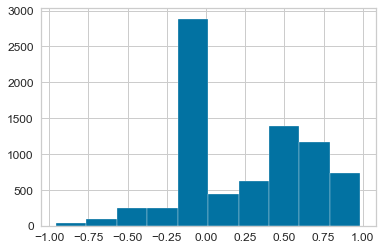

In [267]:
tweet2020['VADER score'].hist()

In [268]:
i = 0

predicted_value = [ ]

while(i<len(tweet2020)):
    if ((tweet2020.iloc[i]['VADER score'] >= 0.50)):
        predicted_value.append('positive')
        i = i+1
    elif ((tweet2020.iloc[i]['VADER score'] < 0.5) & (tweet2020.iloc[i]['VADER score'] > -0.5)):
        predicted_value.append('neutral')
        i = i+1
    elif ((tweet2020.iloc[i]['VADER score'] <= -0.5)):
        predicted_value.append('negative')
        i = i+1
tweet2020['predicted sentiment'] = predicted_value

In [269]:
tweet2020_sentiment = tweet2020.groupby('Date')['VADER score'].mean().to_frame()
tweet2020_sentiment.reset_index(inplace=True)

In [270]:
df = tweet2020[tweet2020['predicted sentiment']=='negative']

words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

stopwords = set(STOPWORDS)
stopwords.add("cardano")
stopwords.add("read")
"""
stopwords.add("t")
stopwords.add("co")
stopwords.add("bitcoin")
stopwords.add("btc")
stopwords.add("eth")
stopwords.add("ltc")
stopwords.add("ethereum")
stopwords.add("Cryptography")
stopwords.add("xtz")
stopwords.add("currency")
stopwords.add("cryptocurrency")
stopwords.add("clockchain")
stopwords.add("block")
stopwords.add("altcoin")
stopwords.add("satoshi")
stopwords.add("distributed Ledger")
stopwords.add("address")
stopwords.add("private key")
stopwords.add("public key")
stopwords.add("hodl")
stopwords.add("blockchain")
stopwords.add("t")
stopwords.add("co")"""

wordcloud_negative = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

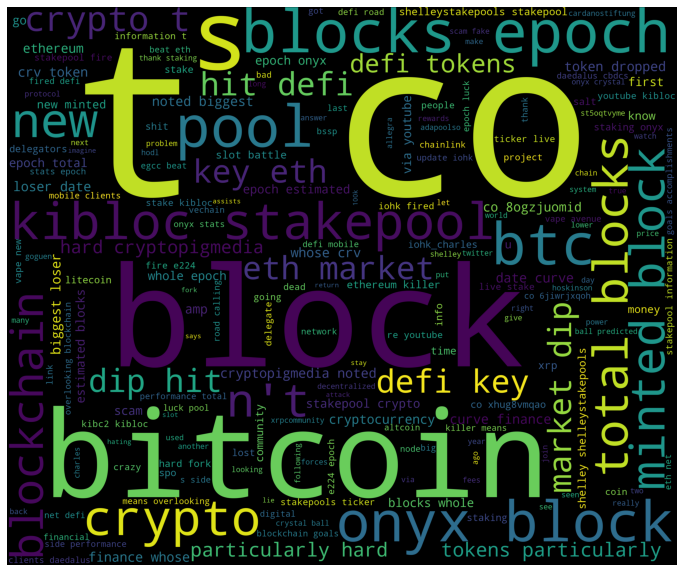

In [271]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_negative)
plt.axis('off')
plt.show()

In [272]:
df = tweet2020[tweet2020['predicted sentiment']=='positive']

words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

stopwords = set(STOPWORDS)
stopwords.add("cardano")
stopwords.add("read")
"""
stopwords.add("t")
stopwords.add("co")

stopwords.add("thinkandgrowbtc")
stopwords.add("rtc")
stopwords.add("rst")
stopwords.add("cryptocurrency")
stopwords.add("crypto")
stopwords.add("litecoin")
stopwords.add("bitcoin")
stopwords.add("btc")
stopwords.add("eth")
stopwords.add("ltc")
stopwords.add("ethereum")
stopwords.add("Cryptography")
stopwords.add("xtz")
stopwords.add("currency")
stopwords.add("cryptocurrency")
stopwords.add("clockchain")
stopwords.add("block")
stopwords.add("altcoin")
stopwords.add("satoshi")
stopwords.add("distributed Ledger")
stopwords.add("address")
stopwords.add("private key")
stopwords.add("public key")
stopwords.add("hodl")
stopwords.add("blockchain")"""

wordcloud_positive = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

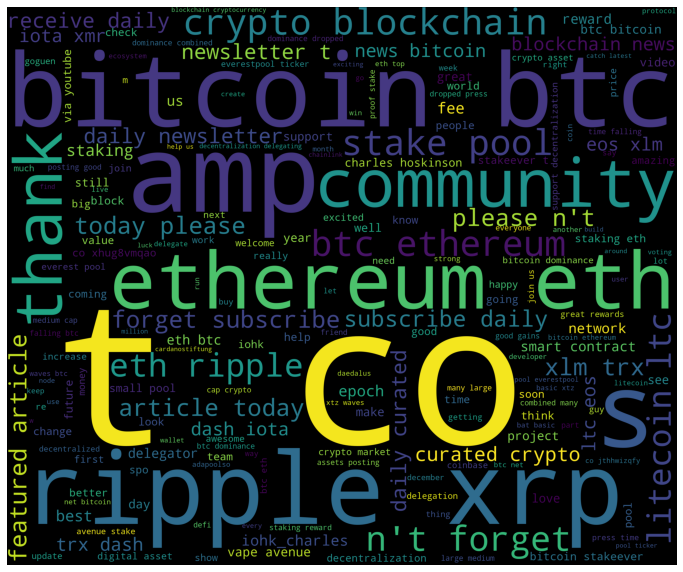

In [273]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_positive)
plt.axis('off')
plt.show()

## Modeling

In [274]:
ada_tweets['Price_Change']=0.0
for i in range(1,len(ada_tweets)):
    if ada_tweets['Close'][i-1] ==0:
        continue
    ada_tweets['Price_Change'][i]=((ada_tweets['Close'][i] - ada_tweets['Close'][i-1])/ada_tweets['Close'][i-1])*100
    
ada_tweets['Volume_Change']=0.0
for i in range(1,len(ada_tweets)):
    ada_tweets['Volume_Change'][i]=((ada_tweets['Volume'][i] - ada_tweets['Volume'][i-1])/ada_tweets['Volume'][i-1])*100

In [275]:
ada_tweets

Date  VADER score      Open      High       Low     Close  Adj Close  \
0  2020-10-01     0.245195  0.101202  0.104311  0.096007  0.097878   0.097878   
1  2020-10-02     0.221654  0.097894  0.099826  0.090471  0.092913   0.092913   
2  2020-10-03     0.095984  0.092913  0.095158  0.092635  0.093684   0.093684   
3  2020-10-04     0.402757  0.093684  0.096791  0.092884  0.096301   0.096301   
4  2020-10-05     0.280624  0.096301  0.098844  0.096255  0.097687   0.097687   
..        ...          ...       ...       ...       ...       ...        ...   
87 2020-12-27     0.236708  0.157835  0.165190  0.150378  0.154422   0.154422   
88 2020-12-28     0.293765  0.154440  0.178583  0.153445  0.176735   0.176735   
89 2020-12-29     0.305050  0.176709  0.196170  0.174039  0.192164   0.192164   
90 2020-12-30     0.273837  0.192022  0.193144  0.175681  0.184040   0.184040   
91 2020-12-31     0.269631  0.184034  0.185749  0.176594  0.181397   0.181397   

          Volume  Price_Change  Day_1_Positive  Volume_Change  
0   4.998130e+08      0.000000               0       0.000000  
1   6.025401e+08     -5.072641               1      20.553098  
2   3.340595e+08      0.829809               1     -44.558135  
3   4.824099e+08      2.793433               1      44.408384  
4   4.328179e+08      1.439237               0     -10.280043  
..           ...           ...             ...            ...  
87  1.578355e+09     -2.155566               1      32.415612  
88  1.732151e+09     14.449366               1       9.744099  
89  2.967669e+09      8.730020               0      71.328540  
90  1.849432e+09     -4.227639               0     -37.680651  
91  1.132268e+09     -1.436101               0     -38.777516  

[92 rows x 11 columns]

In [276]:
ada_tweets['year'], ada_tweets['month'],ada_tweets['day']  = ada_tweets['Date'].dt.year, ada_tweets['Date'].dt.month, ada_tweets['Date'].dt.day


In [277]:
ada_tweets['variation'] = (ada_tweets['High']-ada_tweets['Low'])/ada_tweets['Low']

In [278]:
ada_tweets

Date  VADER score      Open      High       Low     Close  Adj Close  \
0  2020-10-01     0.245195  0.101202  0.104311  0.096007  0.097878   0.097878   
1  2020-10-02     0.221654  0.097894  0.099826  0.090471  0.092913   0.092913   
2  2020-10-03     0.095984  0.092913  0.095158  0.092635  0.093684   0.093684   
3  2020-10-04     0.402757  0.093684  0.096791  0.092884  0.096301   0.096301   
4  2020-10-05     0.280624  0.096301  0.098844  0.096255  0.097687   0.097687   
..        ...          ...       ...       ...       ...       ...        ...   
87 2020-12-27     0.236708  0.157835  0.165190  0.150378  0.154422   0.154422   
88 2020-12-28     0.293765  0.154440  0.178583  0.153445  0.176735   0.176735   
89 2020-12-29     0.305050  0.176709  0.196170  0.174039  0.192164   0.192164   
90 2020-12-30     0.273837  0.192022  0.193144  0.175681  0.184040   0.184040   
91 2020-12-31     0.269631  0.184034  0.185749  0.176594  0.181397   0.181397   

          Volume  Price_Change  Day_1_Positive  Volume_Change  year  month  \
0   4.998130e+08      0.000000               0       0.000000  2020     10   
1   6.025401e+08     -5.072641               1      20.553098  2020     10   
2   3.340595e+08      0.829809               1     -44.558135  2020     10   
3   4.824099e+08      2.793433               1      44.408384  2020     10   
4   4.328179e+08      1.439237               0     -10.280043  2020     10   
..           ...           ...             ...            ...   ...    ...   
87  1.578355e+09     -2.155566               1      32.415612  2020     12   
88  1.732151e+09     14.449366               1       9.744099  2020     12   
89  2.967669e+09      8.730020               0      71.328540  2020     12   
90  1.849432e+09     -4.227639               0     -37.680651  2020     12   
91  1.132268e+09     -1.436101               0     -38.777516  2020     12   

    day  variation  
0     1   0.086494  
1     2   0.103403  
2     3   0.027236  
3     4   0.042063  
4     5   0.026897  
..  ...        ...  
87   27   0.098498  
88   28   0.163824  
89   29   0.127161  
90   30   0.099402  
91   31   0.051842  

[92 rows x 15 columns]

In [279]:
ada_tweets.drop(['Date','Adj Close', 'Open'], axis = 1, inplace = True)

In [280]:
ada_tweets.dtypes

VADER score       float64
High              float64
Low               float64
Close             float64
Volume            float64
Price_Change      float64
Day_1_Positive      int64
Volume_Change     float64
year                int64
month               int64
day                 int64
variation         float64
dtype: object

In [281]:
#Train data that will further be split into train and test for model building and evaluation
#train = ada_tweets[(ada_tweets["year"] < 2020) | (ada_tweets["month"] < 12) ]
train = ada_tweets[(ada_tweets["month"] < 12) ]

# Test data ("new data") -- will be set aside and only be used for final model evaluation
test = ada_tweets[(ada_tweets["month"] == 12) ]

train2 = ada_tweets[(ada_tweets["year"] < 2020) | (ada_tweets["month"] < 11) ]
test2 = ada_tweets[(ada_tweets["year"] == 2020) & (ada_tweets["month"] >= 11)]

#test.drop(['Date','Volume','Adj Close'], axis = 1, inplace = True)
#train2.drop(['Date','Volume','Adj Close'], axis = 1, inplace = True)
#test2.drop(['Date','Volume','Adj Close'], axis = 1, inplace = True)

In [282]:
y_train2=train['Day_1_Positive']
X_train2=train.drop(['Day_1_Positive'],axis=1)

#y_test2 = test2['Day_1_Positive']
#X_test2 = test2.drop('Day_1_Positive', axis = 1)

y_test2 = test['Day_1_Positive']
X_test2 = test.drop('Day_1_Positive', axis = 1)

In [283]:
y_test2

61    1
62    1
63    0
64    1
65    0
66    0
67    0
68    1
69    0
70    0
71    1
72    1
73    1
74    0
75    1
76    0
77    1
78    0
79    0
80    0
81    1
82    0
83    1
84    1
85    1
86    0
87    1
88    1
89    0
90    0
91    0
Name: Day_1_Positive, dtype: int64

In [284]:
X_test2

VADER score      High       Low     Close        Volume  Price_Change  \
61     0.351579  0.173851  0.146573  0.155983  2.071557e+09     -8.945875   
62     0.305477  0.159662  0.151429  0.158557  1.367596e+09      1.650180   
63     0.313882  0.168009  0.155936  0.164212  1.287927e+09      3.566541   
64     0.252682  0.164506  0.146964  0.148241  1.200622e+09     -9.725842   
65     0.182174  0.161383  0.146795  0.159668  1.036100e+09      7.708394   
66     0.271132  0.162406  0.153430  0.158867  8.861379e+08     -0.501666   
67     0.249762  0.159041  0.151737  0.154130  7.894262e+08     -2.981739   
68     0.267068  0.154936  0.138959  0.140928  9.391650e+08     -8.565497   
69     0.294742  0.149810  0.130468  0.148165  1.320753e+09      5.135246   
70     0.307040  0.148530  0.139986  0.141994  7.985505e+08     -4.164951   
71     0.154184  0.142694  0.135182  0.139449  7.048545e+08     -1.792329   
72     0.175547  0.147259  0.139207  0.144460  5.197807e+08      3.593428   
73     0.226002  0.156259  0.143477  0.153964  6.750257e+08      6.578984   
74     0.241729  0.158002  0.149769  0.157992  5.870784e+08      2.616196   
75     0.346359  0.159713  0.153355  0.154305  6.071842e+08     -2.333662   
76     0.261693  0.167599  0.149976  0.167589  9.766998e+08      8.608924   
77     0.240072  0.174342  0.161644  0.163483  1.188727e+09     -2.450041   
78     0.245673  0.168635  0.159152  0.164988  1.101019e+09      0.920585   
79     0.179335  0.170486  0.163320  0.164714  5.866848e+08     -0.166073   
80     0.297192  0.167724  0.158695  0.161988  7.291917e+08     -1.654990   
81     0.176060  0.165416  0.147903  0.152656  1.139902e+09     -5.760921   
82     0.264179  0.160015  0.149451  0.156179  1.138401e+09      2.307803   
83     0.264343  0.157414  0.127420  0.136394  1.484454e+09    -12.668156   
84     0.392602  0.154337  0.132127  0.152883  1.470292e+09     12.089241   
85     0.346149  0.166846  0.150497  0.157564  1.119918e+09      3.061819   
86     0.217154  0.161981  0.149824  0.157824  1.191970e+09      0.165012   
87     0.236708  0.165190  0.150378  0.154422  1.578355e+09     -2.155566   
88     0.293765  0.178583  0.153445  0.176735  1.732151e+09     14.449366   
89     0.305050  0.196170  0.174039  0.192164  2.967669e+09      8.730020   
90     0.273837  0.193144  0.175681  0.184040  1.849432e+09     -4.227639   
91     0.269631  0.185749  0.176594  0.181397  1.132268e+09     -1.436101   

    Volume_Change  year  month  day  variation  
61      -3.719688  2020     12    1   0.186105  
62     -33.982226  2020     12    2   0.054369  
63      -5.825462  2020     12    3   0.077423  
64      -6.778744  2020     12    4   0.119363  
65     -13.703038  2020     12    5   0.099377  
66     -14.473713  2020     12    6   0.058502  
67     -10.913844  2020     12    7   0.048136  
68      18.968048  2020     12    8   0.114976  
69      40.630520  2020     12    9   0.148251  
70     -39.538221  2020     12   10   0.061035  
71     -11.733257  2020     12   11   0.055570  
72     -26.257033  2020     12   12   0.057842  
73      29.867425  2020     12   13   0.089087  
74     -13.028742  2020     12   14   0.054971  
75       3.424720  2020     12   15   0.041459  
76      60.857256  2020     12   16   0.117505  
77      21.708560  2020     12   17   0.078555  
78      -7.378338  2020     12   18   0.059585  
79     -46.714374  2020     12   19   0.043877  
80      24.290187  2020     12   20   0.056895  
81      56.324092  2020     12   21   0.118409  
82      -0.131733  2020     12   22   0.070685  
83      30.398194  2020     12   23   0.235395  
84      -0.953984  2020     12   24   0.168096  
85     -23.830268  2020     12   25   0.108633  
86       6.433734  2020     12   26   0.081142  
87      32.415612  2020     12   27   0.098498  
88       9.744099  2020     12   28   0.163824  
89      71.328540  2020     12   29   0.127161  
90     -37.680651  2020     12   30   0.099402  
91     -38.777516  2

Saving figure correlation_matrix


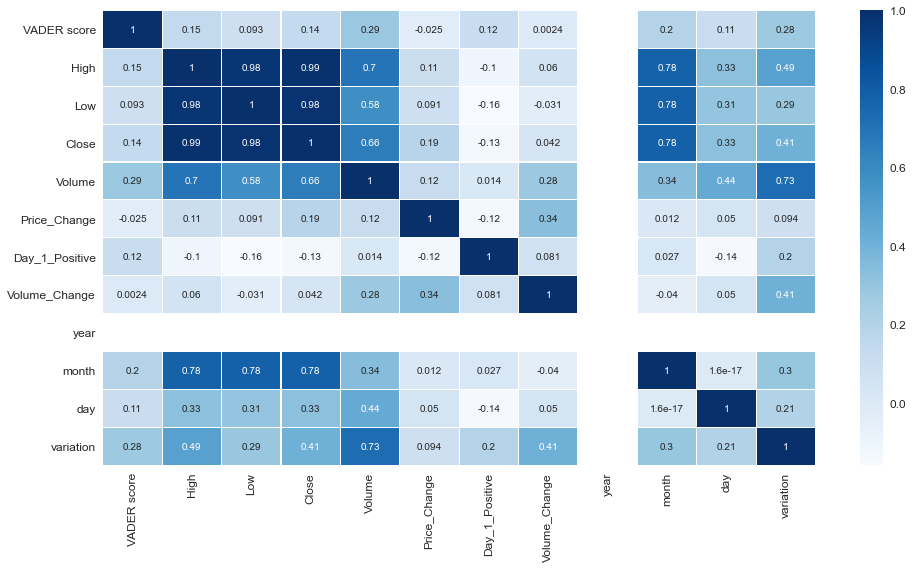

VADER score      High       Low     Close    Volume  \
VADER score        1.000000  0.148771  0.092861  0.136365  0.286278   
High               0.148771  1.000000  0.976858  0.988846  0.695477   
Low                0.092861  0.976858  1.000000  0.983418  0.578647   
Close              0.136365  0.988846  0.983418  1.000000  0.656184   
Volume             0.286278  0.695477  0.578647  0.656184  1.000000   
Price_Change      -0.024898  0.106357  0.091271  0.186681  0.123735   
Day_1_Positive     0.115931 -0.099917 -0.158345 -0.129994  0.014218   
Volume_Change      0.002432  0.059568 -0.030875  0.041615  0.280864   
year                    NaN       NaN       NaN       NaN       NaN   
month              0.195565  0.776227  0.782168  0.781127  0.342292   
day                0.109312  0.328998  0.305413  0.328654  0.441712   
variation          0.280544  0.486708  0.290645  0.410621  0.725352   

                Price_Change  Day_1_Positive  Volume_Change  year  \
VADER score        -0.024898        0.115931       0.002432   NaN   
High                0.106357       -0.099917       0.059568   NaN   
Low                 0.091271       -0.158345      -0.030875   NaN   
Close               0.186681       -0.129994       0.041615   NaN   
Volume              0.123735        0.014218       0.280864   NaN   
Price_Change        1.000000       -0.123085       0.338789   NaN   
Day_1_Positive     -0.123085        1.000000       0.081299   NaN   
Volume_Change       0.338789        0.081299       1.000000   NaN   
year                     NaN             NaN            NaN   NaN   
month               0.012007        0.026506      -0.039517   NaN   
day                 0.050279       -0.140508       0.050194   NaN   
variation           0.093758        0.195372       0.409071   NaN   

                       month           day  variation  
VADER score     1.955651e-01  1.093118e-01   0.280544  
High            7.762273e-01  3.289983e-01   0.486708  
Low             7.821679e-01  3.054135e-01   0.290645  
Close           7.811272e-01  3.286538e-01   0.410621  
Volume          3.422917e-01  4.417119e-01   0.725352  
Price_Change    1.200686e-02  5.027882e-02   0.093758  
Day_1_Positive  2.650642e-02 -1.405078e-01   0.195372  
Volume_Change  -3.951739e-02  5.019382e-02   0.409071  
year                     NaN           NaN        NaN  
month           1.000000e+00  1.593827e-17   0.298142  
day             1.593827e-17  1.000000e+00   0.205390  
variation       2.981423e-01  2.053905e-01   1.000000

In [285]:
# Lets check for correlation

import seaborn as sns
from seaborn import pairplot
sns.set_style("whitegrid")

plt.figure(figsize=(14,8))
sns.heatmap(ada_tweets.corr(), annot = True, cmap="Blues", linewidths=.1)
save_fig("correlation_matrix")
plt.show()

display(ada_tweets.corr())

In [286]:
#X_train2=X_train2.drop(['Open','High','Low'],axis=1)
#X_test2=X_test2.drop(['Open','High','Low'],axis=1)
#X_test=X_test.drop(['Open','High','Low'],axis=1)

In [287]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, X_train2.columns),
    ])

train_prepared2 = full_pipeline.fit_transform(X_train2)
test_prepared2 = full_pipeline.fit_transform(X_test2)
#test_prepared = full_pipeline.fit_transform(X_test)

In [288]:
#Import models' packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

#Classification Models
names = [["Nearest Neighbors",KNeighborsClassifier()],
          ["Linear SVM",SVC()],
          ["Gaussian Process",GaussianProcessClassifier()],
          ["Random Forest",RandomForestClassifier()],
          ["Neural Net",MLPClassifier()],
          ["AdaBoost",AdaBoostClassifier()],
          ["Naive Bayes",GaussianNB()]]

Models = ["Nearest Neighbors",
          "Linear SVM",
          "Gaussian Process",
          "Random Forest",
          "Neural Net",
          "AdaBoost",
          "Naive Bayes"]


classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]
                     

#storing MSEs and MAEs for visualization

Model_Accuracy=[]
Model_F1=[]
Model_Precision=[]
Model_Recall=[]
Model_ROC = []


for name, model in names: 
    print('Model ', name, "performance: ")
    model.fit(X_train2, y_train2.values.ravel())
    y_test_pred = model.predict(X_test2)
    
    Accuracy = cross_val_score(model, X_train2, y_train2, cv=4, scoring='accuracy')
    f1 = cross_val_score(model, X_train2, y_train2, cv=4, scoring='f1')
    Precision = cross_val_score(model, X_train2, y_train2, cv=4, scoring='precision')
    Recall = cross_val_score(model, X_train2, y_train2, cv=4, scoring='recall')
    ROC = cross_val_score(model, X_train2, y_train2, cv=4, scoring='roc_auc')
    Model_Accuracy.append(Accuracy)
    Model_F1.append(f1)
    Model_Precision.append(Precision)
    Model_Recall.append(Recall)
    Model_ROC.append(ROC)

    print("Accuracy: ", Accuracy)
    print("F1: ", f1)
    print("Precision: ", Precision)
    print("Recall: ", Recall)
    #print("ROC_AUC: ", ROC)
    print("-" * 19)

Model  Nearest Neighbors performance: 
Accuracy:  [0.5625     0.66666667 0.6        0.4       ]
F1:  [0.53333333 0.54545455 0.625      0.18181818]
Precision:  [0.66666667 1.         0.625      0.33333333]
Recall:  [0.44444444 0.375      0.625      0.125     ]
-------------------
Model  Linear SVM performance: 
Accuracy:  [0.5625     0.53333333 0.53333333 0.26666667]
F1:  [0.72       0.69565217 0.69565217 0.15384615]
Precision:  [0.5625     0.53333333 0.53333333 0.2       ]
Recall:  [1.    1.    1.    0.125]
-------------------
Model  Gaussian Process performance: 
Accuracy:  [0.4375     0.46666667 0.46666667 0.46666667]
F1:  [0. 0. 0. 0.]
Precision:  [0. 0. 0. 0.]
Recall:  [0. 0. 0. 0.]
-------------------
Model  Random Forest performance: 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy:  [0.5625     0.73333333 0.33333333 0.26666667]
F1:  [0.66666667 0.71428571 0.47058824 0.        ]
Precision:  [0.58333333 0.625      0.33333333 0.        ]
Recall:  [0.88888889 0.625      0.5        0.        ]
-------------------
Model  Neural Net performance: 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy:  [0.5625     0.46666667 0.53333333 0.46666667]
F1:  [0.72       0.69565217 0.         0.        ]
Precision:  [0.5625 0.     0.     0.    ]
Recall:  [1. 0. 0. 1.]
-------------------
Model  AdaBoost performance: 
Accuracy:  [0.375      0.6        0.53333333 0.2       ]
F1:  [0.5        0.5        0.42857143 0.        ]
Precision:  [0.45454545 0.75       0.5        0.        ]
Recall:  [0.55555556 0.375      0.375      0.        ]
-------------------
Model  Naive Bayes performance: 
Accuracy:  [0.4375     0.33333333 0.53333333 0.26666667]
F1:  [0.         0.44444444 0.69565217 0.15384615]
Precision:  [0.         0.4        0.53333333 0.2       ]
Recall:  [0.    0.5   1.    0.125]
-------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [289]:
Acc_Mean = []
F1_Mean=[]
ROC_Mean = []
for i in Model_Accuracy:
    m=np.mean(i)
    Acc_Mean.append(m)
for i in Model_F1:
    m=np.mean(i)
    F1_Mean.append(m)
for i in Model_ROC:
    m=np.mean(i)
    ROC_Mean.append(m)

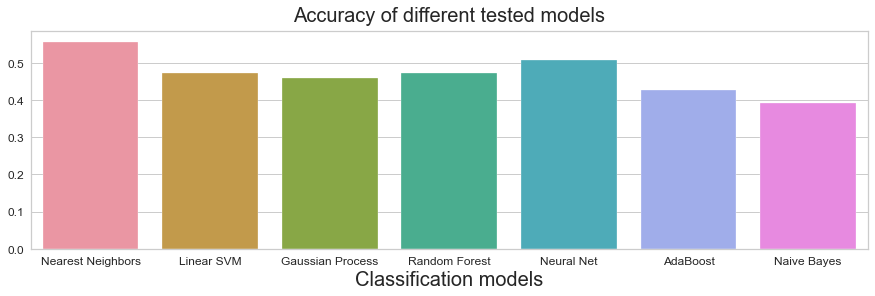

In [290]:
d = {'Model' : Models, 'Accuracy': Acc_Mean}
A_vis = pd.DataFrame(d)

fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="Model", y="Accuracy", data=d, ax = ax)
ax.set_title("Accuracy of different tested models", pad=10, fontdict={'fontsize': 20})
ax.set_xlabel("Classification models",fontsize=20)
plt.show()

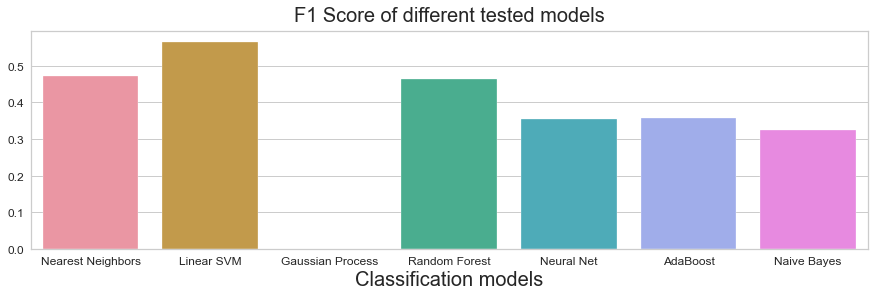

In [291]:
d = {'Model' : Models, 'Accuracy': F1_Mean}
A_vis = pd.DataFrame(d)

fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="Model", y="Accuracy", data=d, ax = ax)
ax.set_title("F1 Score of different tested models", pad=10, fontdict={'fontsize': 20})
ax.set_xlabel("Classification models",fontsize=20)
plt.show()

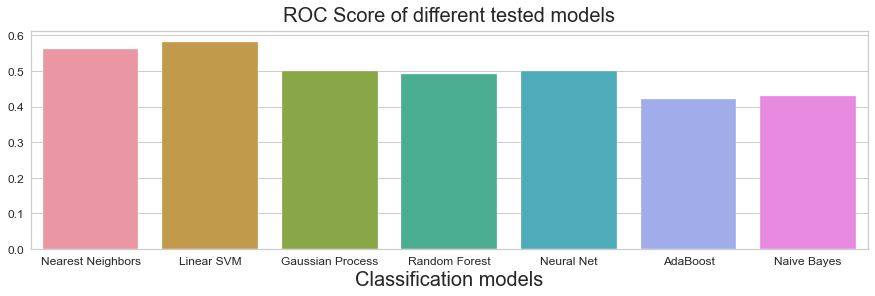

In [292]:
d = {'Model' : Models, 'Accuracy': ROC_Mean}
A_vis = pd.DataFrame(d)

fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="Model", y="Accuracy", data=d, ax = ax)
ax.set_title("ROC Score of different tested models", pad=10, fontdict={'fontsize': 20})
ax.set_xlabel("Classification models",fontsize=20)
plt.show()

In [293]:
model = KNeighborsClassifier(3)
model.fit(X_train2, y_train2.values.ravel())
y_test_pred = model.predict(X_test2)
#test2['pred'] = y_test_pred

In [294]:
test2 = test2.sort_values(by=['Price_Change'])

In [295]:
test2 = test2[test2.Price_Change >= 5]

In [296]:
y_train2=train2['Day_1_Positive']
X_train2=train2.drop(['Day_1_Positive'],axis=1)

y_test2 = test2['Day_1_Positive']
X_test2 = test2.drop('Day_1_Positive', axis = 1)
#X_test2 = X_test2.drop('pred', axis = 1)

In [297]:
X_test2

VADER score      High       Low     Close        Volume  Price_Change  \
69     0.294742  0.149810  0.130468  0.148165  1.320753e+09      5.135246   
38     0.205577  0.108298  0.100179  0.106621  6.257871e+08      5.170696   
47     0.328141  0.111970  0.105112  0.109600  6.225686e+08      5.376509   
31     0.186048  0.098487  0.092853  0.098197  6.095658e+08      5.524630   
53     0.269928  0.158153  0.142471  0.153510  2.203606e+09      6.044487   
73     0.226002  0.156259  0.143477  0.153964  6.750257e+08      6.578984   
65     0.182174  0.161383  0.146795  0.159668  1.036100e+09      7.708394   
54     0.312662  0.182066  0.153571  0.166323  2.566225e+09      8.346688   
76     0.261693  0.167599  0.149976  0.167589  9.766998e+08      8.608924   
89     0.305050  0.196170  0.174039  0.192164  2.967669e+09      8.730020   
52     0.298839  0.152735  0.120190  0.144760  2.294032e+09      8.887134   
50     0.262276  0.118231  0.105778  0.118226  6.885539e+08     11.675136   
84     0.392602  0.154337  0.132127  0.152883  1.470292e+09     12.089241   
51     0.292432  0.133603  0.116771  0.132945  1.385060e+09     12.449884   
36     0.256290  0.109683  0.096721  0.109105  7.177312e+08     12.486339   
88     0.293765  0.178583  0.153445  0.176735  1.732151e+09     14.449366   
58     0.315468  0.171569  0.139560  0.164791  1.932319e+09     16.849845   

    Volume_Change  year  month  day  variation  
69      40.630520  2020     12    9   0.148251  
38     -27.389439  2020     11    8   0.081045  
47      55.448263  2020     11   17   0.065245  
31      -8.002839  2020     11    1   0.060677  
53      -3.941780  2020     11   23   0.110072  
73      29.867425  2020     12   13   0.089087  
65     -13.703038  2020     12    5   0.099377  
54      16.455685  2020     11   24   0.185549  
76      60.857256  2020     12   16   0.117505  
89      71.328540  2020     12   29   0.127161  
52      65.626859  2020     11   22   0.270780  
50      16.570857  2020     11   20   0.117728  
84      -0.953984  2020     12   24   0.168096  
51     101.154988  2020     11   21   0.144145  
36      29.438360  2020     11    6   0.134014  
88       9.744099  2020     12   28   0.163824  
58      28.332846  2020     11   28   0.229357

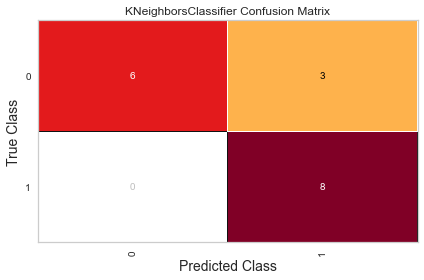

In [298]:
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train2, y_train2.values.ravel())

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test2, y_test2)

# How did we do?
cm.show()

In [299]:
model

KNeighborsClassifier(n_neighbors=3)

In [300]:
X_test2

VADER score      High       Low     Close        Volume  Price_Change  \
69     0.294742  0.149810  0.130468  0.148165  1.320753e+09      5.135246   
38     0.205577  0.108298  0.100179  0.106621  6.257871e+08      5.170696   
47     0.328141  0.111970  0.105112  0.109600  6.225686e+08      5.376509   
31     0.186048  0.098487  0.092853  0.098197  6.095658e+08      5.524630   
53     0.269928  0.158153  0.142471  0.153510  2.203606e+09      6.044487   
73     0.226002  0.156259  0.143477  0.153964  6.750257e+08      6.578984   
65     0.182174  0.161383  0.146795  0.159668  1.036100e+09      7.708394   
54     0.312662  0.182066  0.153571  0.166323  2.566225e+09      8.346688   
76     0.261693  0.167599  0.149976  0.167589  9.766998e+08      8.608924   
89     0.305050  0.196170  0.174039  0.192164  2.967669e+09      8.730020   
52     0.298839  0.152735  0.120190  0.144760  2.294032e+09      8.887134   
50     0.262276  0.118231  0.105778  0.118226  6.885539e+08     11.675136   
84     0.392602  0.154337  0.132127  0.152883  1.470292e+09     12.089241   
51     0.292432  0.133603  0.116771  0.132945  1.385060e+09     12.449884   
36     0.256290  0.109683  0.096721  0.109105  7.177312e+08     12.486339   
88     0.293765  0.178583  0.153445  0.176735  1.732151e+09     14.449366   
58     0.315468  0.171569  0.139560  0.164791  1.932319e+09     16.849845   

    Volume_Change  year  month  day  variation  
69      40.630520  2020     12    9   0.148251  
38     -27.389439  2020     11    8   0.081045  
47      55.448263  2020     11   17   0.065245  
31      -8.002839  2020     11    1   0.060677  
53      -3.941780  2020     11   23   0.110072  
73      29.867425  2020     12   13   0.089087  
65     -13.703038  2020     12    5   0.099377  
54      16.455685  2020     11   24   0.185549  
76      60.857256  2020     12   16   0.117505  
89      71.328540  2020     12   29   0.127161  
52      65.626859  2020     11   22   0.270780  
50      16.570857  2020     11   20   0.117728  
84      -0.953984  2020     12   24   0.168096  
51     101.154988  2020     11   21   0.144145  
36      29.438360  2020     11    6   0.134014  
88       9.744099  2020     12   28   0.163824  
58      28.332846  2020     11   28   0.229357

In [301]:
X_train2

VADER score      High       Low     Close        Volume  Price_Change  \
0      0.245195  0.104311  0.096007  0.097878  4.998130e+08      0.000000   
1      0.221654  0.099826  0.090471  0.092913  6.025401e+08     -5.072641   
2      0.095984  0.095158  0.092635  0.093684  3.340595e+08      0.829809   
3      0.402757  0.096791  0.092884  0.096301  4.824099e+08      2.793433   
4      0.280624  0.098844  0.096255  0.097687  4.328179e+08      1.439237   
5      0.141001  0.098548  0.092168  0.092909  7.836890e+08     -4.891132   
6      0.225863  0.094394  0.090105  0.093936  4.204129e+08      1.105383   
7      0.299560  0.096776  0.090903  0.096242  4.575579e+08      2.454863   
8      0.204172  0.132220  0.121652  0.127556  9.946031e+08     32.537069   
9      0.248232  0.110540  0.101445  0.105025  9.237160e+08    -17.663825   
10     0.160795  0.108865  0.104381  0.106538  7.974801e+08      1.440609   
11     0.152184  0.132220  0.121652  0.127556  9.946031e+08     19.728478   
12     0.297908  0.132220  0.121652  0.127556  9.946031e+08      0.000000   
13     0.257007  0.112231  0.105712  0.107297  7.132642e+08    -15.882651   
14     0.245422  0.107591  0.104979  0.106635  5.621973e+08     -0.616979   
15     0.211961  0.107317  0.102537  0.104064  5.535619e+08     -2.411028   
16     0.276427  0.106979  0.103366  0.106104  4.720052e+08      1.960332   
17     0.219110  0.107601  0.105305  0.107388  4.328511e+08      1.210133   
18     0.136933  0.110921  0.106188  0.108677  4.907752e+08      1.200320   
19     0.183793  0.108841  0.101226  0.102494  7.079552e+08     -5.689336   
20     0.286054  0.108286  0.101831  0.106187  7.794101e+08      3.603138   
21     0.230038  0.112414  0.105482  0.110572  9.333356e+08      4.129507   
22     0.214982  0.111754  0.105602  0.108083  1.110973e+09     -2.251022   
23     0.330678  0.109662  0.107539  0.108075  8.681945e+08     -0.007402   
24     0.230618  0.108730  0.106178  0.106351  7.227434e+08     -1.595189   
25     0.194580  0.107381  0.099430  0.103097  8.802218e+08     -3.059680   
26     0.292455  0.105490  0.102070  0.102827  9.135223e+08     -0.261889   
27     0.251620  0.103349  0.095570  0.098977  8.767219e+08     -3.744153   
28     0.304026  0.100712  0.095000  0.095376  8.830550e+08     -3.638219   
29     0.159645  0.095587  0.090363  0.093369  8.557826e+08     -2.104303   
30     0.301222  0.095270  0.092208  0.093056  6.625920e+08     -0.335229   

    Volume_Change  year  month  day  variation  
0        0.000000  2020     10    1   0.086494  
1       20.553098  2020     10    2   0.103403  
2      -44.558135  2020     10    3   0.027236  
3       44.408384  2020     10    4   0.042063  
4      -10.280043  2020     10    5   0.026897  
5       81.066672  2020     10    6   0.069221  
6      -46.354621  2020     10    7   0.047600  
7        8.835352  2020     10    8   0.064607  
8      117.372071  2020     10    9   0.086871  
9       -7.127171  2020     10   10   0.089654  
10     -13.666096  2020     10   11   0.042958  
11      24.718232  2020     10   12   0.086871  
12       0.000000  2020     10   13   0.086871  
13     -28.286548  2020     10   14   0.061668  
14     -21.179657  2020     10   15   0.024881  
15      -1.536010  2020     10   16   0.046617  
16     -14.733068  2020     10   17   0.034953  
17      -8.295267  2020     10   18   0.021803  
18      13.381976  2020     10   19   0.044572  
19      44.252456  2020     10   20   0.075228  
20      10.093133  2020     10   21   0.063389  
21      19.748980  2020     10   22   0.065717  
22      19.032573  2020     10   23   0.058256  
23     -21.852812  2020     10   24   0.019742  
24     -16.753290  2020     10   25   0.024035  
25      21.788991  2020     10   26   0.079966  
26       3.783191  2020     10   27   0.033506  
27      -4.028412  2020     10   28   0.081396  
28       0.722364  2020     10   29   0.060126  
29      -3.088412  2020     10   30   0.057811  
30     -22.574727  2

## Fine Tuning Top 2 Performing Models

In [302]:
test2

VADER score      High       Low     Close        Volume  Price_Change  \
69     0.294742  0.149810  0.130468  0.148165  1.320753e+09      5.135246   
38     0.205577  0.108298  0.100179  0.106621  6.257871e+08      5.170696   
47     0.328141  0.111970  0.105112  0.109600  6.225686e+08      5.376509   
31     0.186048  0.098487  0.092853  0.098197  6.095658e+08      5.524630   
53     0.269928  0.158153  0.142471  0.153510  2.203606e+09      6.044487   
73     0.226002  0.156259  0.143477  0.153964  6.750257e+08      6.578984   
65     0.182174  0.161383  0.146795  0.159668  1.036100e+09      7.708394   
54     0.312662  0.182066  0.153571  0.166323  2.566225e+09      8.346688   
76     0.261693  0.167599  0.149976  0.167589  9.766998e+08      8.608924   
89     0.305050  0.196170  0.174039  0.192164  2.967669e+09      8.730020   
52     0.298839  0.152735  0.120190  0.144760  2.294032e+09      8.887134   
50     0.262276  0.118231  0.105778  0.118226  6.885539e+08     11.675136   
84     0.392602  0.154337  0.132127  0.152883  1.470292e+09     12.089241   
51     0.292432  0.133603  0.116771  0.132945  1.385060e+09     12.449884   
36     0.256290  0.109683  0.096721  0.109105  7.177312e+08     12.486339   
88     0.293765  0.178583  0.153445  0.176735  1.732151e+09     14.449366   
58     0.315468  0.171569  0.139560  0.164791  1.932319e+09     16.849845   

    Day_1_Positive  Volume_Change  year  month  day  variation  
69               0      40.630520  2020     12    9   0.148251  
38               0     -27.389439  2020     11    8   0.081045  
47               0      55.448263  2020     11   17   0.065245  
31               0      -8.002839  2020     11    1   0.060677  
53               1      -3.941780  2020     11   23   0.110072  
73               1      29.867425  2020     12   13   0.089087  
65               0     -13.703038  2020     12    5   0.099377  
54               0      16.455685  2020     11   24   0.185549  
76               0      60.857256  2020     12   16   0.117505  
89               0      71.328540  2020     12   29   0.127161  
52               1      65.626859  2020     11   22   0.270780  
50               1      16.570857  2020     11   20   0.117728  
84               1      -0.953984  2020     12   24   0.168096  
51               1     101.154988  2020     11   21   0.144145  
36               0      29.438360  2020     11    6   0.134014  
88               1       9.744099  2020     12   28   0.163824  
58               1      28.332846  2020     11   28   0.229357

In [303]:
from sklearn import model_selection

clf_rf_grid = RandomForestClassifier()
params = {
    "max_features": [0.4, "auto"],
    "n_estimators": [5, 50],
    "min_samples_leaf": [1, 0.1],
    "random_state": [42],
    "max_depth": [3, 4, 5, 6, 7]
}
cv = model_selection.GridSearchCV(clf_rf_grid, params,
                                  n_jobs=-1).fit(X_train2, y_train2)
print(cv.best_params_)

rf_best = RandomForestClassifier(
    **{
        "max_features": 0.4,
        "max_depth":5,
        "min_samples_leaf": 1,
        "n_estimators": 5,
        "random_state": 42,
    })
rf_best.fit(X_train2, y_train2)
rf_best.score(X_test2, y_test2)

{'max_depth': 3, 'max_features': 0.4, 'min_samples_leaf': 0.1, 'n_estimators': 50, 'random_state': 42}


0.47058823529411764

In [304]:
clf_knn_grid = KNeighborsClassifier()
params = {
    "n_neighbors": range(2,20),
}
cv = model_selection.GridSearchCV(clf_knn_grid, params,
                                  n_jobs=-1).fit(X_train2, y_train2)
print(cv.best_params_)

{'n_neighbors': 12}
